In [3]:
import pandas as pd

In [4]:
# Load CSV file into a DataFrame
df = pd.read_csv('../data/cleaveland.csv')

# Print the first few rows of the DataFrame to check if it loaded correctly
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

  ca thal  num  
0  0    6    0  
1  3    3    2  
2  2    7    1  
3  0    3    0  
4  0    3    0  
5  0  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
columns = list(df.columns)

In [8]:
missing_cols = []

for column in columns:

    try :

        col = df[column]

        # Use isna() to check for missing values
        miss_val_count = col.value_counts()["?"]

        print(miss_val_count,"- missing values in column ",column)
        missing_cols.append(column)
    
    except : 
        continue

4 - missing values in column  ca
2 - missing values in column  thal


In [9]:
missing_cols

['ca', 'thal']

In [10]:
for column in missing_cols:

    mode = df[column].mode()[0]

    df[column] = df[column].replace('?', mode).astype('int64')

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
import matplotlib.pyplot as plt

for column in columns:
    x = df[column].values
    y = df['num'].values

    plt.scatter(x, y)
    plt.xlabel(column)
    plt.ylabel('target')
    plt.title('Scatter plot of '+column+' vs. target')
    plt.savefig(str('../scatter plots/'+column+' vs. target.jpg'))
    plt.show()

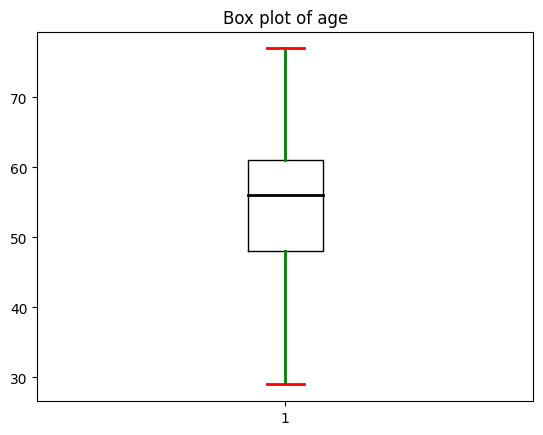

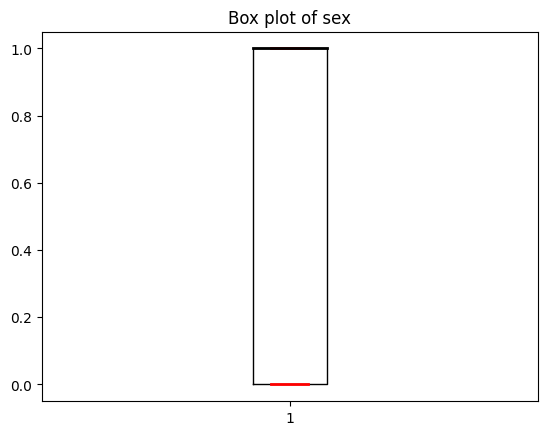

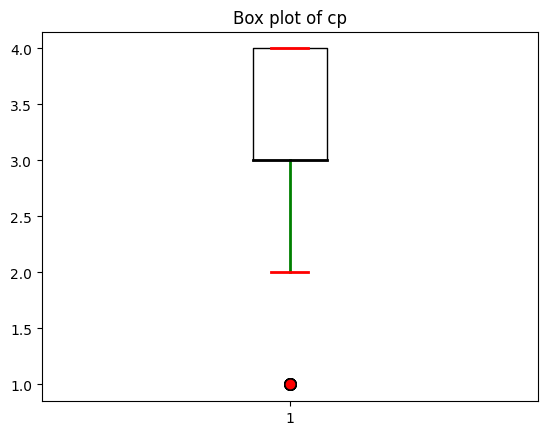

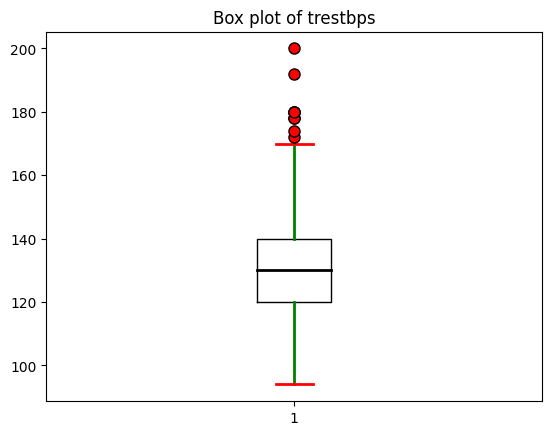

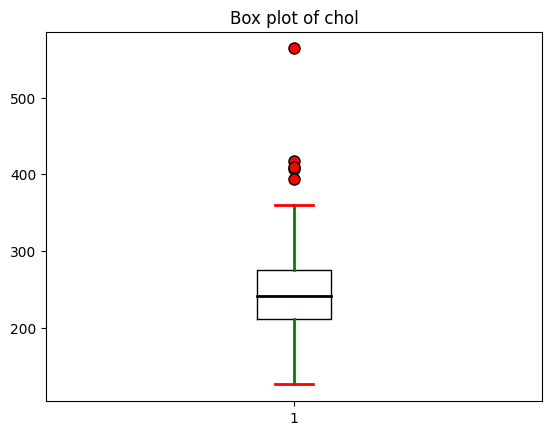

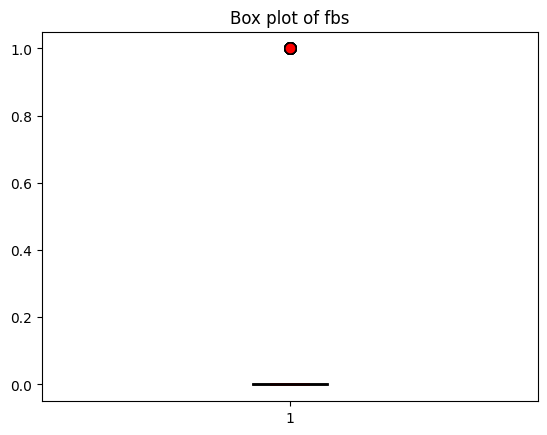

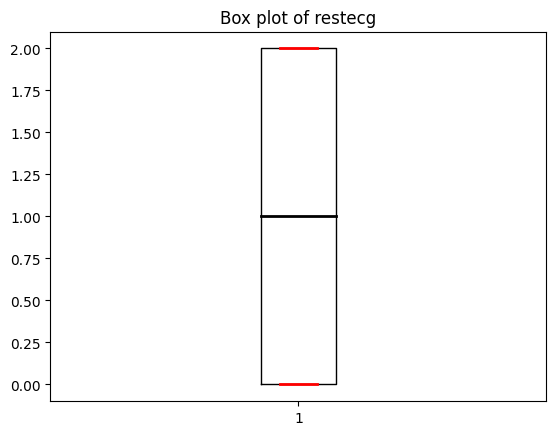

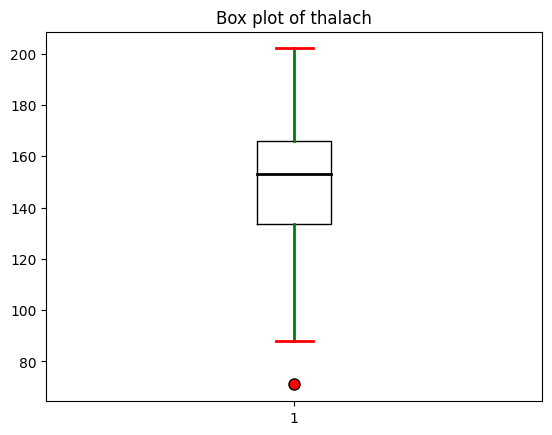

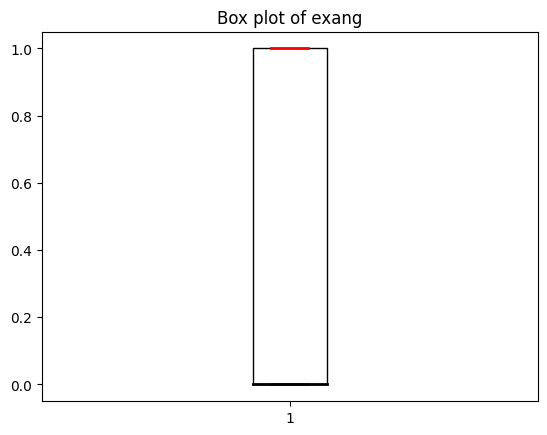

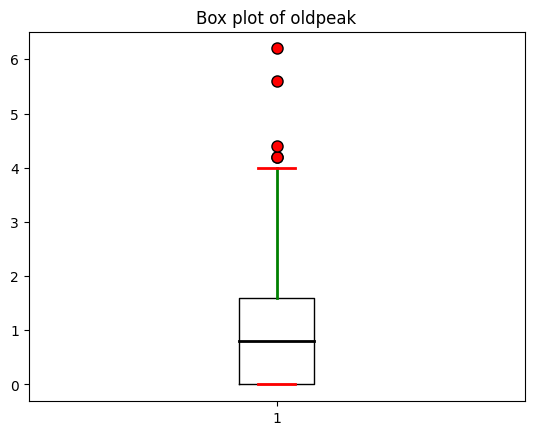

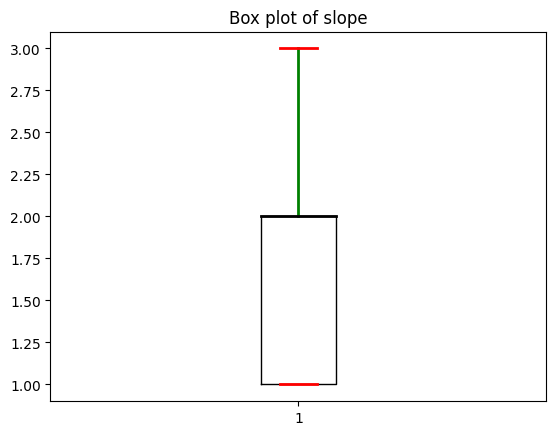

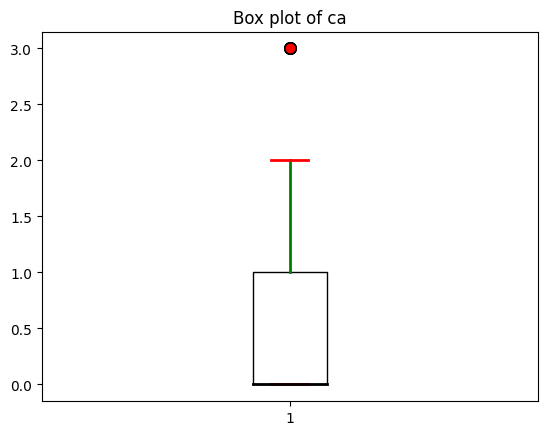

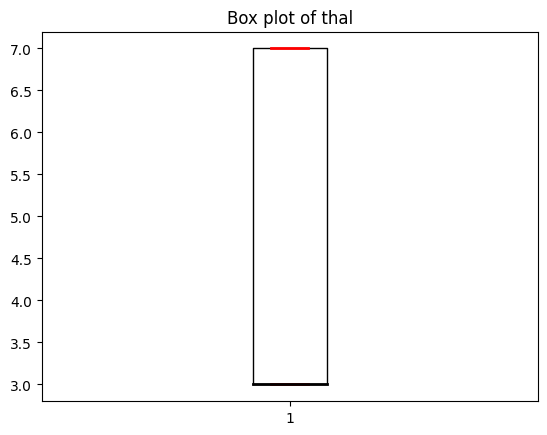

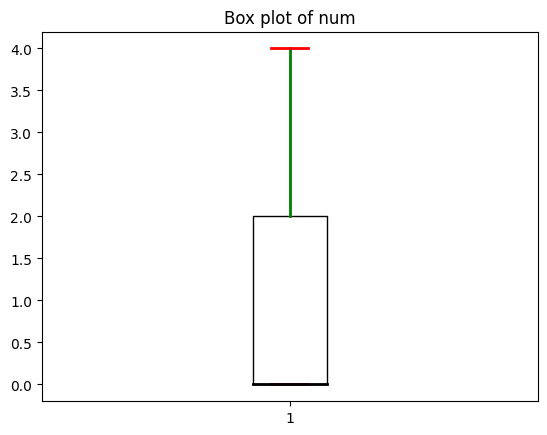

In [25]:
for column in columns:

        x = df[column].values
        plt.boxplot(x,
                whiskerprops=dict(linestyle='-', linewidth=2, color='green'), 
                capprops=dict(linestyle='-', linewidth=2, color='red'), 
                medianprops=dict(linestyle='-', linewidth=2, color='black'), 
                flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black'))
        plt.title('Box plot of '+column)
        plt.savefig(str('../box plots/'+column+'.jpg'))
        plt.show()


In [12]:

df_scaled = df.copy()

# Iterate over the columns of the DataFrame
for column in df.columns:
    # Find the minimum and maximum values of the column
    col_min = df[column].min()
    col_max = df[column].max()

    # Apply min-max scaling to the column
    df_scaled[column] = (df[column] - col_min) / (col_max - col_min)

In [13]:
df_scaled.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.00
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,0.50
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,0.25
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.00
5,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.000000,0.00,0.00
6,0.687500,0.0,1.000000,0.433962,0.324201,0.0,1.0,0.679389,0.0,0.580645,1.0,0.666667,0.00,0.75
7,0.583333,0.0,1.000000,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,0.00,0.00
8,0.708333,1.0,1.000000,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,1.00,0.50
9,0.500000,1.0,1.000000,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.000000,1.00,0.25


In [14]:
df_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330,0.221122,0.430693,0.234323
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113,0.311458,0.484596,0.307134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
